In [141]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df = pd.read_csv('/workspaces/projects/Credit_Classification_End_to_End/credit-score.csv',low_memory=False)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Missing Values

In [143]:
df.isna().sum()[df.isna().sum() > 0]

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

Name and SSN aren't important for the dataset, because we already have the `Customer_ID`, so we'll drop them.

In [144]:
df.drop(columns=['Name', 'SSN'], inplace=True)

In [145]:
columns= df.columns.to_list()
df[columns[:13]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Customer_ID            100000 non-null  object 
 2   Month                  100000 non-null  object 
 3   Age                    100000 non-null  object 
 4   Occupation             100000 non-null  object 
 5   Annual_Income          100000 non-null  object 
 6   Monthly_Inhand_Salary  84998 non-null   float64
 7   Num_Bank_Accounts      100000 non-null  int64  
 8   Num_Credit_Card        100000 non-null  int64  
 9   Interest_Rate          100000 non-null  int64  
 10  Num_of_Loan            100000 non-null  object 
 11  Type_of_Loan           88592 non-null   object 
 12  Delay_from_due_date    100000 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 9.9+ MB


In [146]:
df[columns[13:]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Num_of_Delayed_Payment    92998 non-null   object 
 1   Changed_Credit_Limit      100000 non-null  object 
 2   Num_Credit_Inquiries      98035 non-null   float64
 3   Credit_Mix                100000 non-null  object 
 4   Outstanding_Debt          100000 non-null  object 
 5   Credit_Utilization_Ratio  100000 non-null  float64
 6   Credit_History_Age        90970 non-null   object 
 7   Payment_of_Min_Amount     100000 non-null  object 
 8   Total_EMI_per_month       100000 non-null  float64
 9   Amount_invested_monthly   95521 non-null   object 
 10  Payment_Behaviour         100000 non-null  object 
 11  Monthly_Balance           98800 non-null   object 
 12  Credit_Score              100000 non-null  object 
dtypes: float64(3), object(10)
memory usage: 9.9+ 

In [147]:
print(columns)

['ID', 'Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [148]:
df= df[['Age',
 'Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Num_of_Delayed_Payment',
 'Credit_Utilization_Ratio',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Credit_Score',
 'Credit_History_Age',
 'Type_of_Loan',
 'Delay_from_due_date','Customer_ID']]
df.head().T

,0,1,2,3,4
Age,23,23,-500,23,23
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Num_Bank_Accounts,3,3,3,3,3
Num_Credit_Card,4,4,4,4,4
Num_of_Delayed_Payment,7,NaN,7,4,NaN
Credit_Utilization_Ratio,26.82262,31.94496,28.609352,31.377862,24.797347
Payment_of_Min_Amount,No,No,No,No,No
Total_EMI_per_month,49.574949,49.574949,49.574949,49.574949,49.574949
Credit_Score,Good,Good,Good,Good,Good
Credit_History_Age,22 Years and 1 Months,NaN,22 Years and 3 Months,22 Years and 4 Months,22 Years and 5 Months


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Annual_Income             100000 non-null  object 
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Num_of_Delayed_Payment    92998 non-null   object 
 5   Credit_Utilization_Ratio  100000 non-null  float64
 6   Payment_of_Min_Amount     100000 non-null  object 
 7   Total_EMI_per_month       100000 non-null  float64
 8   Credit_Score              100000 non-null  object 
 9   Credit_History_Age        90970 non-null   object 
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Customer_ID               100000 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usa

## Data Transformation

In [150]:
df['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [151]:
df.Age = df.Age.str.replace('_', '', regex=True).astype('float')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  object 
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Num_of_Delayed_Payment    92998 non-null   object 
 5   Credit_Utilization_Ratio  100000 non-null  float64
 6   Payment_of_Min_Amount     100000 non-null  object 
 7   Total_EMI_per_month       100000 non-null  float64
 8   Credit_Score              100000 non-null  object 
 9   Credit_History_Age        90970 non-null   object 
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Customer_ID               100000 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usa

In [153]:
df.Annual_Income = df.Annual_Income.str.replace('_', '', regex=True).astype('float')
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.str.replace('_', '', regex=True).astype('float')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Num_of_Delayed_Payment    92998 non-null   float64
 5   Credit_Utilization_Ratio  100000 non-null  float64
 6   Payment_of_Min_Amount     100000 non-null  object 
 7   Total_EMI_per_month       100000 non-null  float64
 8   Credit_Score              100000 non-null  object 
 9   Credit_History_Age        90970 non-null   object 
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Customer_ID               100000 non-null  object 
dtypes: float64(5), int64(3), object(5)
memory usa

In [155]:
columns= df.columns.to_list()
print(columns)

['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Credit_Score', 'Credit_History_Age', 'Type_of_Loan', 'Delay_from_due_date', 'Customer_ID']


In [156]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,110.649700,6.862447e+02,-500.00,24.000000,33.000000,42.000000,8698.0
Annual_Income,100000.0,176415.701298,1.429618e+06,7005.93,19457.500000,37578.610000,72790.920000,24198062.0
Num_Bank_Accounts,100000.0,17.091280,1.174048e+02,-1.00,3.000000,6.000000,7.000000,1798.0
Num_Credit_Card,100000.0,22.474430,1.290574e+02,0.00,4.000000,5.000000,7.000000,1499.0
Num_of_Delayed_Payment,92998.0,30.923342,2.260319e+02,-3.00,9.000000,14.000000,18.000000,4397.0
Credit_Utilization_Ratio,100000.0,32.285173,5.116875e+00,20.00,28.052567,32.305784,36.496663,50.0
Total_EMI_per_month,100000.0,1403.118217,8.306041e+03,0.00,30.306660,69.249473,161.224249,82331.0
Delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.00,10.000000,18.000000,28.000000,67.0


In [157]:
df.loc[df.Age > 100, 'Age'] = np.nan
df.loc[df.Age < 1, 'Age'] = np.nan

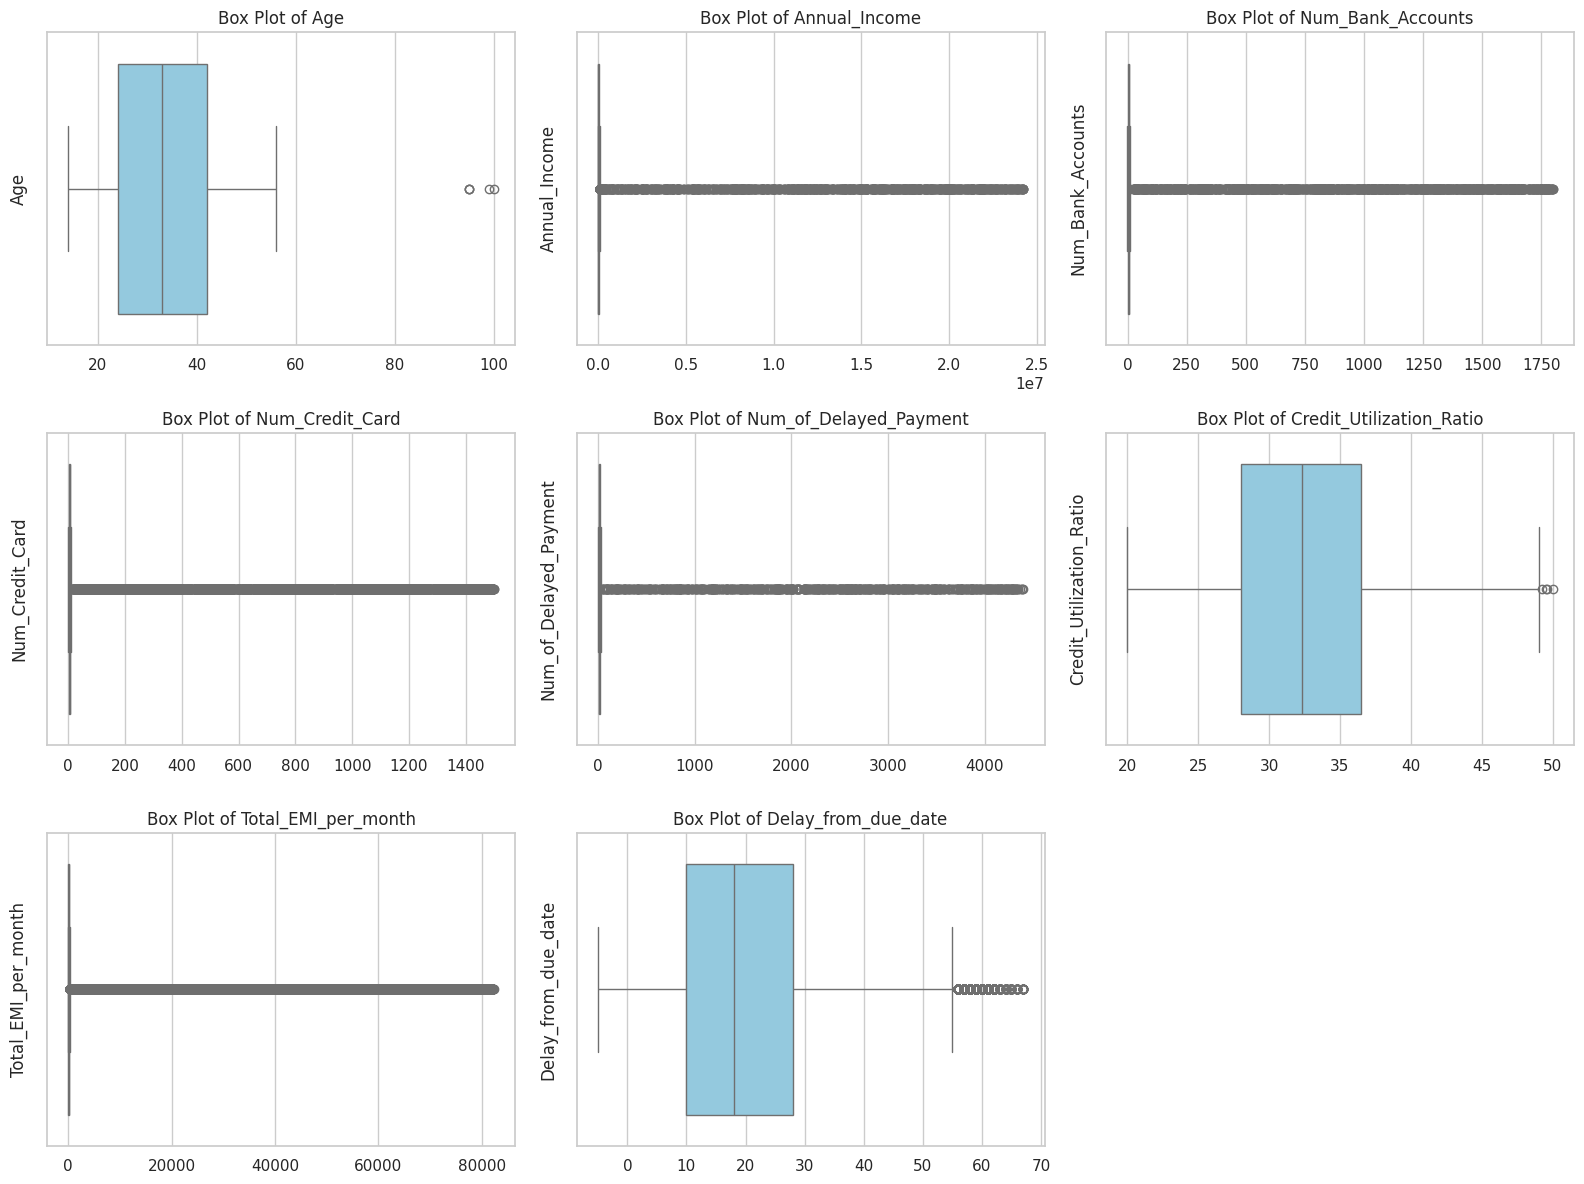

In [158]:
import seaborn as sns
numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(3, 3, i + 1) 
    sns.boxplot(x=numerical_columns[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel('')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [159]:
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [160]:
['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Credit_Score', 'Credit_History_Age', 'Type_of_Loan', 'Delay_from_due_date']

['Age',
 'Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Num_of_Delayed_Payment',
 'Credit_Utilization_Ratio',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Credit_Score',
 'Credit_History_Age',
 'Type_of_Loan',
 'Delay_from_due_date']

In [161]:
df.Payment_of_Min_Amount.unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [162]:
df.Payment_of_Min_Amount.replace('NM', np.nan, inplace=True)
df.loc[df.Age > 100, 'Age'] = np.nan
df.loc[df.Age < 1, 'Age'] = np.nan
df.loc[df.Num_Credit_Card > 11, 'Num_Credit_Card'] = np.nan
df.loc[df.Annual_Income > 300000, 'Annual_Income'] = np.nan
df.loc[df.Total_EMI_per_month > 5000, 'Total_EMI_per_month'] = np.nan
df.loc[df.Num_Bank_Accounts > 100, 'Num_Bank_Accounts'] = np.nan
df.loc[df.Num_Bank_Accounts < 0, 'Num_Bank_Accounts'] = np.nan
df.loc[df.Num_of_Delayed_Payment > 100, 'Num_of_Delayed_Payment'] = np.nan

It's possible that are people over 100 years old, but a threshold need to be set, so now any person over 100 and less than 1 is a null value that we'll try to fill down below.

In [163]:
df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Total_EMI_per_month,Delay_from_due_date
count,97224.000000,99007.000000,98733.000000,97729.000000,92274.000000,100000.000000,97012.000000,100000.000000
mean,33.323274,50510.789579,5.403928,5.533322,13.322225,32.285173,111.983968,21.068780
std,10.778909,38333.115918,2.968060,2.067703,6.352251,5.116875,180.676679,14.860104
min,14.000000,7005.930000,0.000000,0.000000,-3.000000,20.000000,0.000000,-5.000000
25%,24.000000,19344.270000,3.000000,4.000000,9.000000,28.052567,29.371497,10.000000
50%,33.000000,36993.940000,5.000000,5.000000,14.000000,32.305784,66.603729,18.000000
75%,42.000000,71676.795000,7.000000,7.000000,18.000000,36.496663,147.792533,28.000000
max,100.000000,277803.000000,100.000000,11.000000,98.000000,50.000000,4991.000000,67.000000


Setting `mean_columns` and `last_columns`. They are named according to their NA are going to be filled. By looking at the dataset we can see every customer shows up multiple times from January to August, so the `last_columns` NA values will try to fill the NA by looking at the last non null value that customer have. The same ideia is going to be used by `mean_columns`, but in this case we'll use the mean value.

In [164]:
mean_columns = [
    'Num_of_Delayed_Payment',
    'Num_Credit_Card', 'Annual_Income', 'Total_EMI_per_month', 'Num_Bank_Accounts'
    ]
last_columns = ['Age', 'Type_of_Loan']

In [165]:
temp = df.groupby('Customer_ID')[last_columns].last()

In [166]:
df.loc[df.Age.isnull(), 'Age'] = df.Customer_ID.map(temp.Age)
df.loc[df.Type_of_Loan.isnull(), 'Type_of_Loan'] = df.Customer_ID.map(temp.Type_of_Loan)

In [167]:
df.head().T

,0,1,2,3,4
Age,23.0,23.0,23.0,23.0,23.0
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Num_Bank_Accounts,3.0,3.0,3.0,3.0,3.0
Num_Credit_Card,4.0,4.0,4.0,4.0,4.0
Num_of_Delayed_Payment,7.0,NaN,7.0,4.0,NaN
Credit_Utilization_Ratio,26.82262,31.94496,28.609352,31.377862,24.797347
Payment_of_Min_Amount,No,No,No,No,No
Total_EMI_per_month,49.574949,49.574949,49.574949,49.574949,49.574949
Credit_Score,Good,Good,Good,Good,Good
Credit_History_Age,22 Years and 1 Months,NaN,22 Years and 3 Months,22 Years and 4 Months,22 Years and 5 Months


In [168]:
df.Credit_History_Age.fillna('0 0 0 0', inplace=True)

In [169]:
for index, column in df.iterrows():
    df.loc[index, 'Credit_History_Age_Formated'] = float(df.loc[index, 'Credit_History_Age'].split()[0])*12+float(df.loc[index, 'Credit_History_Age'].split()[3])

In [170]:
df.loc[df.Credit_History_Age_Formated == 0, 'Credit_History_Age_Formated'] = np.nan

In [171]:
df.Credit_History_Age_Formated.interpolate(inplace = True)
df.drop(columns='Credit_History_Age', inplace=True)

I'm defining all the null values for minimun payment amount to `No`.

In [172]:
df.Payment_of_Min_Amount.fillna('No', inplace=True)

By checking the posible results for type of loan we can see that there is a "Not Specified" option, so when it's null I'm changing it to this.

In [173]:
df.Type_of_Loan.unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [174]:
df.Type_of_Loan.fillna('Not Specified', inplace=True)

In [175]:
digits = re.compile('[^\d.]') #this regex is to select everything that isn't a number or a dot.

I replace with `''` (nothing) everything that is not a digit or a dot in the mean columns.

In [176]:
for index, column in df.iterrows():
    for x in mean_columns:
        df.loc[index, x] = digits.sub('', str(df.loc[index, x]))

/tmp/ipykernel_11333/3054057308.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[index, x] = digits.sub('', str(df.loc[index, x]))
/tmp/ipykernel_11333/3054057308.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[index, x] = digits.sub('', str(df.loc[index, x]))
/tmp/ipykernel_11333/3054057308.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '19114.12' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[index, x] = digits.sub('', str(df.loc[index, x]))
/tmp/ipykernel_11333/3054057308.py:3: FutureWarning: Setting an item

In [177]:
df.head().T

,0,1,2,3,4
Age,23.0,23.0,23.0,23.0,23.0
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Num_Bank_Accounts,3.0,3.0,3.0,3.0,3.0
Num_Credit_Card,4.0,4.0,4.0,4.0,4.0
Num_of_Delayed_Payment,7.0,,7.0,4.0,
Credit_Utilization_Ratio,26.82262,31.94496,28.609352,31.377862,24.797347
Payment_of_Min_Amount,No,No,No,No,No
Total_EMI_per_month,49.57494921489417,49.57494921489417,49.57494921489417,49.57494921489417,49.57494921489417
Credit_Score,Good,Good,Good,Good,Good
Type_of_Loan,"Auto Loan, Credit-Builder Loan, Personal Loan,...","Auto Loan, Credit-Builder Loan, Personal Loan,...","Auto Loan, Credit-Builder Loan, Personal Loan,...","Auto Loan, Credit-Builder Loan, Personal Loan,...","Auto Loan, Credit-Builder Loan, Personal Loan,..."


Now I need to replace the `''` (nothings) with NaN, then save the column as a float.

In [178]:
df.Num_of_Delayed_Payment.replace('', np.nan, inplace=True)
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.astype('float')
df.Num_Credit_Card.replace('', np.nan, inplace=True)
df.Num_Credit_Card = df.Num_Credit_Card.astype('float')
df.Annual_Income.replace('', np.nan, inplace=True)
df.Annual_Income = df.Annual_Income.astype('float')
df.Num_Bank_Accounts.replace('', np.nan, inplace=True)
df.Num_Bank_Accounts = df.Num_Bank_Accounts.astype('float')

In [179]:
df.Total_EMI_per_month.replace('', np.nan, inplace=True)
df.Total_EMI_per_month = df.Total_EMI_per_month.astype('float')

In [180]:
df[mean_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Num_of_Delayed_Payment  92274 non-null  float64
 1   Num_Credit_Card         97729 non-null  float64
 2   Annual_Income           99007 non-null  float64
 3   Total_EMI_per_month     97012 non-null  float64
 4   Num_Bank_Accounts       98733 non-null  float64
dtypes: float64(5)
memory usage: 3.8 MB


In [181]:
temp2 = df.groupby('Customer_ID')[mean_columns].mean()

In [182]:
df.isnull().sum()

Age                               0
Annual_Income                   993
Num_Bank_Accounts              1267
Num_Credit_Card                2271
Num_of_Delayed_Payment         7726
Credit_Utilization_Ratio          0
Payment_of_Min_Amount             0
Total_EMI_per_month            2988
Credit_Score                      0
Type_of_Loan                      0
Delay_from_due_date               0
Customer_ID                       0
Credit_History_Age_Formated       0
dtype: int64

Now I can map all the null values to the temp2 table, which contains the means for each client.

In [183]:
df.loc[df.Num_of_Delayed_Payment.isnull(), 'Num_of_Delayed_Payment'] = df.Customer_ID.map(temp2.Num_of_Delayed_Payment)
df.loc[df.Annual_Income.isnull(), 'Annual_Income'] = df.Customer_ID.map(temp2.Annual_Income)
df.loc[df.Total_EMI_per_month.isnull(), 'Total_EMI_per_month'] = df.Customer_ID.map(temp2.Total_EMI_per_month)
df.loc[df.Num_Bank_Accounts.isnull(), 'Num_Bank_Accounts'] = df.Customer_ID.map(temp2.Num_Bank_Accounts)

In [184]:
df.loc[df.Num_Credit_Card.isnull(), 'Num_Credit_Card'] = df.Customer_ID.map(temp2.Num_Credit_Card)

In [185]:
df.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Credit_Score,Type_of_Loan,Delay_from_due_date,Customer_ID,Credit_History_Age_Formated
0,23.0,19114.12,3.0,4.0,7.0,26.822620,No,49.574949,Good,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,CUS_0xd40,265.0
1,23.0,19114.12,3.0,4.0,6.0,31.944960,No,49.574949,Good,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,CUS_0xd40,266.0
2,23.0,19114.12,3.0,4.0,7.0,28.609352,No,49.574949,Good,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,CUS_0xd40,267.0
3,23.0,19114.12,3.0,4.0,4.0,31.377862,No,49.574949,Good,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,CUS_0xd40,268.0
4,23.0,19114.12,3.0,4.0,6.0,24.797347,No,49.574949,Good,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,CUS_0xd40,269.0


Just save the dataset so we can start with the clean version in the next notebook!

In [186]:
df.to_csv('cleaned.csv', index=False)